# First I import the needed libraries that help in data analysis

In [266]:
# import needed libraries

# optional import to ignore warnings related to libraries
import warnings
# numpy library is needed to perform mathematical operations  
import numpy as np 
# matplotlib library is needed for creating plots
import matplotlib.pyplot as plt #
# pandas library is needed for data analysis
import pandas as pd
# seaborn library is needed for statistical data visualization
import seaborn as sns
# sklearn library impute is needed for replacing missing values
from sklearn.impute import KNNImputer
# confusion_matrix is needed for calculating TP/FP, TN/FN scores
from sklearn.metrics import confusion_matrix
# sklearn library metrics is needed for getting performance statistics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# ignore warnings related to above libraries
warnings.filterwarnings("ignore")

# Import the Dataset

In [267]:
# read the source file into data frame.
df = pd.read_excel('purchase-order-items.xlsx')
df.head()

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


***becuse the 'Item Name' and 'Currency Code' are objects, it would be helpful but we have the  Item ID instead and we can reach a solution throgh it***

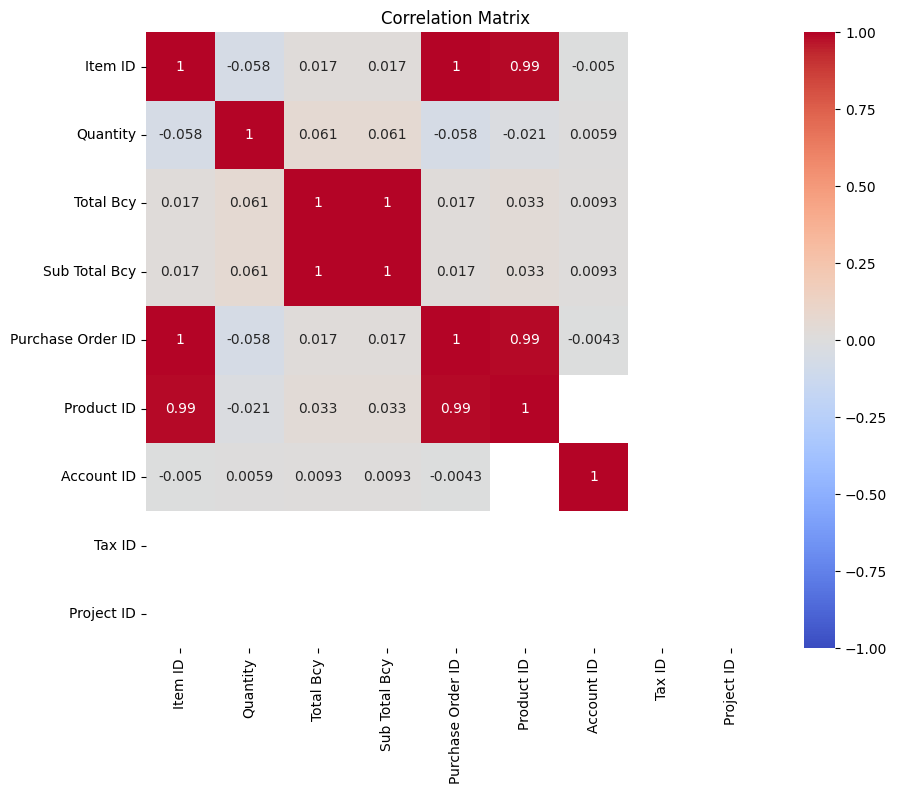

In [269]:
# Step 2: Compute correlation matrix
corr_matrix = df.corr()

# Step 3: Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

***In correlation we estimate that their is empty relations between some column such as Tax ID Project ID***

In [270]:
# drop the 'Item Name' column
df.drop(columns=['Item Name','Currency Code','Tax ID','Project ID'], inplace=True, axis=1)

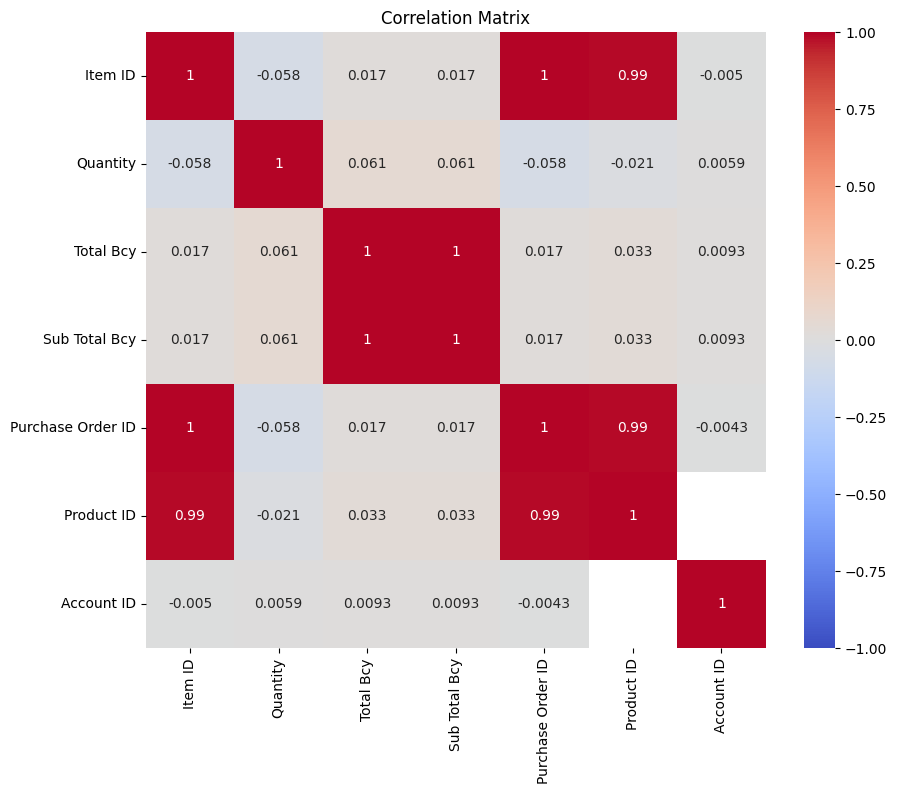

In [271]:
#Compute correlation matrix
corr_matrix = df.corr()

#Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

***This correlation show that their are relations between some of features, but we won't drop it becuse it might help in grouping***

In [272]:
df = df.sample(frac=1)
df

,Item ID,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Account ID
2320,3263831000016759121,650.0,2762.50,2762.50,3263831000016759017,3.263831e+18,3263831000000034003
122,3263831000000341092,6.0,14238.00,14238.00,3263831000000341080,NaN,3263831000000034003
2786,3263831000022471210,444.0,1949.16,1949.16,3263831000022471084,3.263831e+18,3263831000000034003
2296,3263831000016759043,1600.0,2640.00,2640.00,3263831000016759017,3.263831e+18,3263831000000034003
1838,3263831000010366085,12.0,2832.00,2832.00,3263831000010366071,3.263831e+18,3263831000000034003
...,...,...,...,...,...,...,...
78,3263831000000208035,20.0,59000.00,59000.00,3263831000000208031,NaN,3263831000000034003
2923,3263831000025408079,1824.0,3290.20,3290.20,3263831000025408021,3.263831e+18,3263831000000034003
872,3263831000004080093,6.0,331.80,331.80,3263831000004080033,3.263831e+18,3263831000000034003
1357,3263831000006843076,120.0,16560.00,16560.00,3263831000006843064,3.263831e+18,3263831000000034003


In [273]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 2320 to 306
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Quantity           3150 non-null   float64
 2   Total Bcy          3150 non-null   float64
 3   Sub Total Bcy      3150 non-null   float64
 4   Purchase Order ID  3150 non-null   int64  
 5   Product ID         2910 non-null   float64
 6   Account ID         3150 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 196.9 KB
None


In [274]:
df.head()

,Item ID,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Account ID
2320,3263831000016759121,650.0,2762.50,2762.50,3263831000016759017,3.263831e+18,3263831000000034003
122,3263831000000341092,6.0,14238.00,14238.00,3263831000000341080,NaN,3263831000000034003
2786,3263831000022471210,444.0,1949.16,1949.16,3263831000022471084,3.263831e+18,3263831000000034003
2296,3263831000016759043,1600.0,2640.00,2640.00,3263831000016759017,3.263831e+18,3263831000000034003
1838,3263831000010366085,12.0,2832.00,2832.00,3263831000010366071,3.263831e+18,3263831000000034003


In [275]:
# Convert one column to int
df[['Quantity']] = df[['Quantity']].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 2320 to 306
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Quantity           3150 non-null   int32  
 2   Total Bcy          3150 non-null   float64
 3   Sub Total Bcy      3150 non-null   float64
 4   Purchase Order ID  3150 non-null   int64  
 5   Product ID         2910 non-null   float64
 6   Account ID         3150 non-null   int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 184.6 KB


In [276]:
df.head()

,Item ID,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Account ID
2320,3263831000016759121,650,2762.50,2762.50,3263831000016759017,3.263831e+18,3263831000000034003
122,3263831000000341092,6,14238.00,14238.00,3263831000000341080,NaN,3263831000000034003
2786,3263831000022471210,444,1949.16,1949.16,3263831000022471084,3.263831e+18,3263831000000034003
2296,3263831000016759043,1600,2640.00,2640.00,3263831000016759017,3.263831e+18,3263831000000034003
1838,3263831000010366085,12,2832.00,2832.00,3263831000010366071,3.263831e+18,3263831000000034003


***In this section i thought these columns are samllier, but it turns out they are different***

In [277]:
# Compare two columns, say 'col1' and 'col2'
if df['Total Bcy'].equals(df['Sub Total Bcy']):
    df = df.drop(columns=['Sub Total Bcy'])  # drop duplicate column


In [278]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 2320 to 306
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Quantity           3150 non-null   int32  
 2   Total Bcy          3150 non-null   float64
 3   Sub Total Bcy      3150 non-null   float64
 4   Purchase Order ID  3150 non-null   int64  
 5   Product ID         2910 non-null   float64
 6   Account ID         3150 non-null   int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 184.6 KB
None


In [279]:
if df['Total Bcy'].equals(df['Sub Total Bcy']):
    print("✅ Columns are exactly the same (same values in same order).")
else:
    print("❌ Columns are different.")

❌ Columns are different.


In [280]:
# Show rows where they differ
diff = df[df['Total Bcy'] != df['Sub Total Bcy']]
print(diff)


                 Item ID  Quantity  Total Bcy  Sub Total Bcy  \
222  3263831000000641065        22    3905.54        3985.24   
227  3263831000000641077       260   10210.14       10418.51   
232  3263831000000641091       700   97862.56       99859.76   
218  3263831000000641063         2     395.22         403.29   
221  3263831000000641087       315   40561.20       41388.98   
224  3263831000000641081       450   34054.02       34749.00   
231  3263831000000641083       320   41899.72       42754.82   
229  3263831000000641067        96    1207.39        1232.03   
219  3263831000000641071        96   13474.96       13749.96   
223  3263831000000641073        96   17293.79       17646.72   
230  3263831000000641075       160   12329.87       12581.50   
225  3263831000000641089       315   25154.11       25667.46   
226  3263831000000641069        96    1937.29        1976.83   
228  3263831000000641085        70    1447.57        1477.11   
220  3263831000000641079       160    51

***In this section i did an extra work, which is calculate the Total Bcy for every Purchase Order ID***

In [281]:
# Group by Purchase Order ID and calculate total "Total Bcy"
grouped_total_bcy = df.groupby("Purchase Order ID")["Total Bcy"].sum().reset_index()

# Display grouped results
print(grouped_total_bcy)

       Purchase Order ID  Total Bcy
0    3263831000000089040  434760.25
1    3263831000000092040  429480.00
2    3263831000000097043  173970.00
3    3263831000000099094  825300.00
4    3263831000000101066  439000.00
..                   ...        ...
526  3263831000025835005  473920.00
527  3263831000025845025  434735.55
528  3263831000025845108  434770.00
529  3263831000025874007  141112.90
530  3263831000025887003  908125.00

[531 rows x 2 columns]


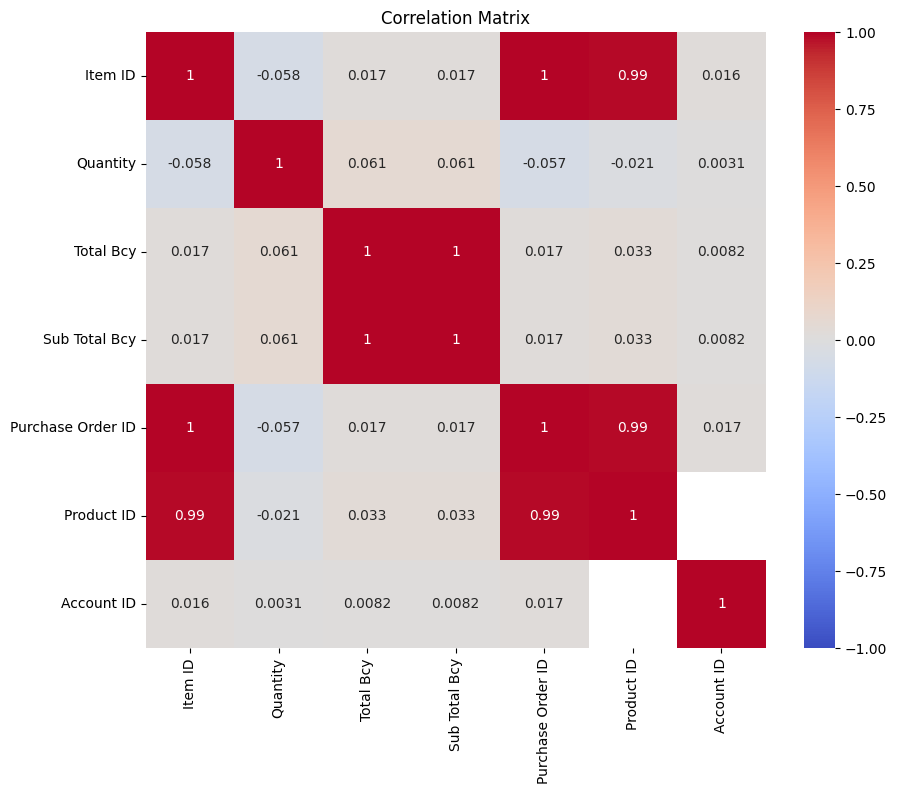

In [282]:
#Compute correlation matrix
corr_matrix = df.corr()

#Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Now, I will use KNN aproch to feld the missing value 

I will start with 'Product ID'

In [283]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Example: select only numeric columns
num_df = df.select_dtypes(include=[np.number])

# Initialize KNNImputer (n_neighbors = number of similar rows to use)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform
imputed = imputer.fit_transform(num_df)

# Convert back to DataFrame
df[num_df.columns] = pd.DataFrame(imputed, columns=num_df.columns)

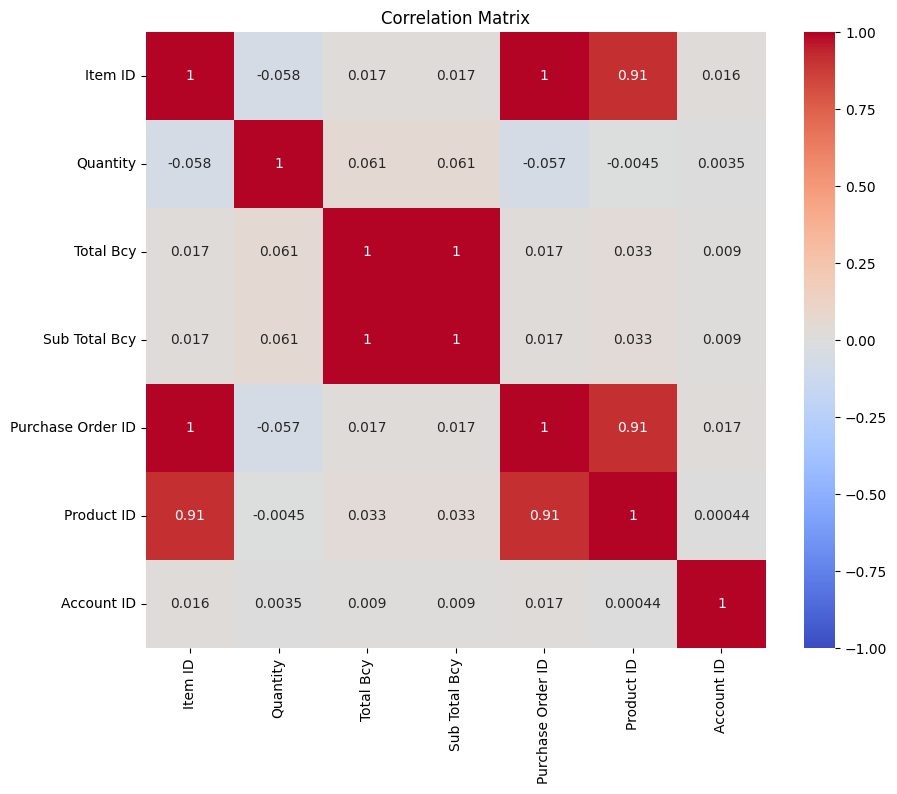

In [284]:
#Compute correlation matrix
corr_matrix = df.corr()

#Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [285]:
df.drop(columns=['Sub Total Bcy'], inplace=True, axis=1)

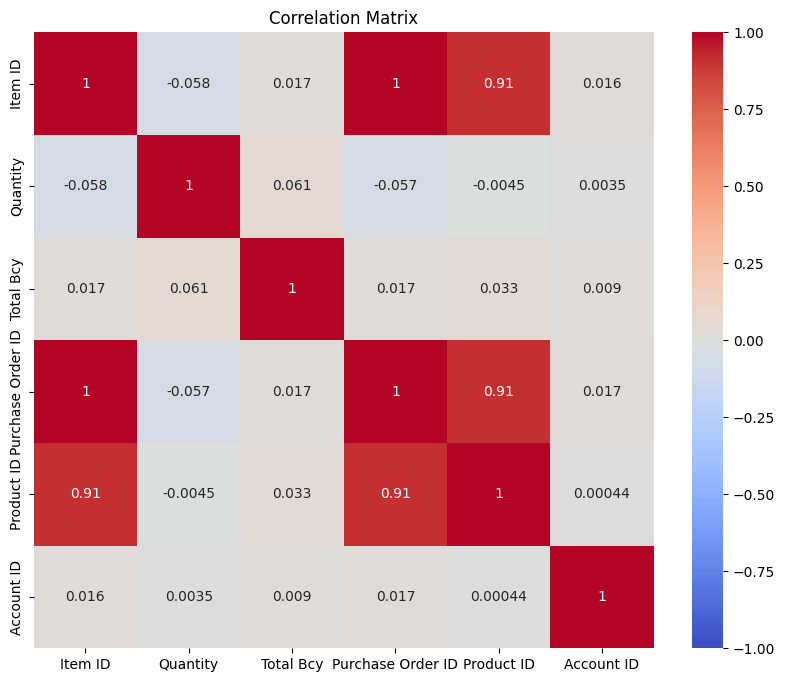

In [286]:
#Compute correlation matrix
corr_matrix = df.corr()

#Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# K-Means is chosen because:  
- It is efficient and easy to implement.  
- Results are interpretable through cluster centers.  
- The output can be visualized using scatter plots, making it easy to communicate business insights. 

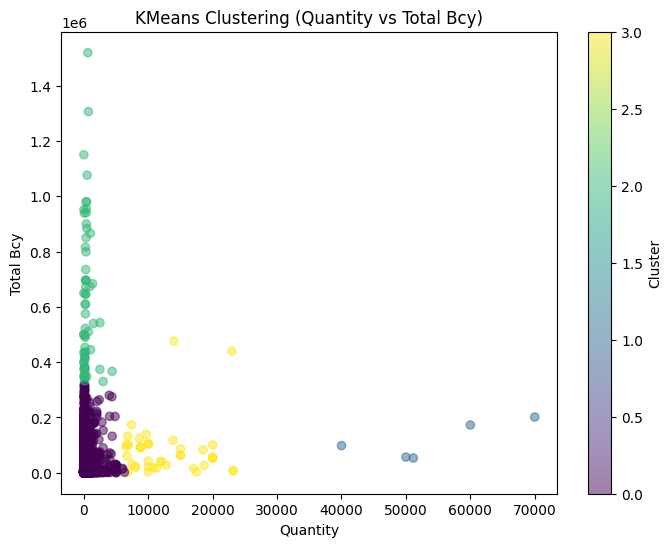

In [287]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['Quantity', 'Total Bcy']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Quantity'], df['Total Bcy'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Quantity")
plt.ylabel("Total Bcy")
plt.title("KMeans Clustering (Quantity vs Total Bcy)")
plt.colorbar(label="Cluster")
plt.show()

In [288]:
# Cluster centers (in original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=X.columns)
print(cluster_centers)



       Quantity      Total Bcy
0    219.377507   36379.985360
1  54230.000000  116293.550000
2    492.790323  616715.102903
3  12592.095238   82099.845952


I used K-Means clustering to automatically group the purchase order items based on their quantity and total value, help to discover patterns or segments in the data.

   Purchase Order ID  Quantity  Total Bcy  Cluster
0       3.263831e+18     140.0  434760.25        0
1       3.263831e+18     144.0  429480.00        0
2       3.263831e+18     822.0  173970.00        0
3       3.263831e+18     272.0  825300.00        1
4       3.263831e+18     156.0  439000.00        0


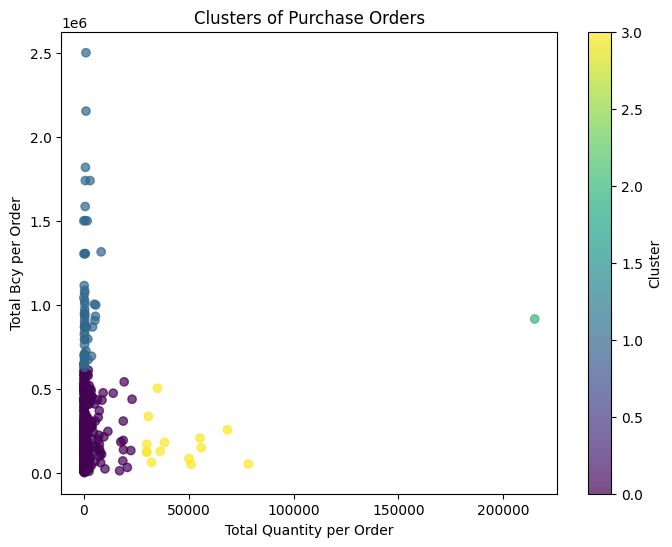

In [289]:
# Cluster and group according to Purchase Order ID

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Group by Purchase Order ID and calculate total Quantity and Total Bcy for each order
grouped = df.groupby("Purchase Order ID")[["Quantity", "Total Bcy"]].sum().reset_index()

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[["Quantity", "Total Bcy"]])

# Apply KMeans clustering (choose number of clusters, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Show grouped and clustered data
print(grouped.head())

# Optional: Visualize clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(grouped['Quantity'], grouped['Total Bcy'], c=grouped['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Total Quantity per Order")
plt.ylabel("Total Bcy per Order")
plt.title("Clusters of Purchase Orders")
plt.colorbar(label='Cluster')
plt.show()

In [290]:
# Cluster centers (in original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=grouped[["Quantity", "Total Bcy"]].columns)
print(cluster_centers)

        Quantity     Total Bcy
0    1466.019704  2.273370e+05
1    1157.232143  1.021728e+06
2  215000.000000  9.169500e+05
3   44477.785714  1.760702e+05


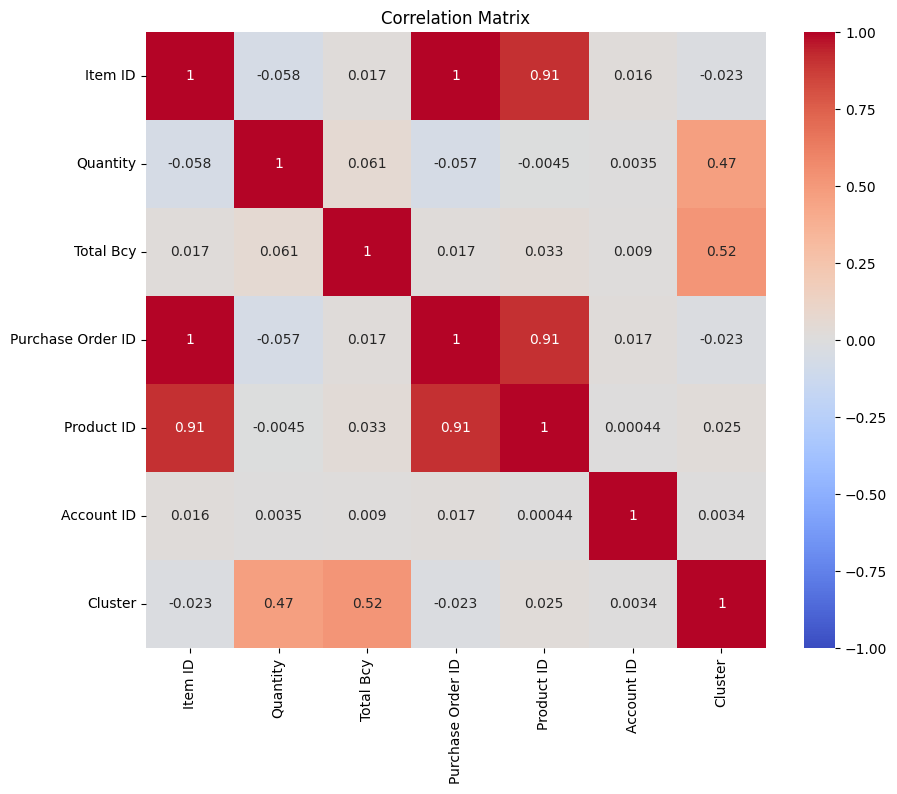

In [291]:
#Compute correlation matrix
corr_matrix = df.corr()

#Optional - Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [292]:
# Group Item ID and Purchase Order ID based on Product ID

grouped = df.groupby('Product ID')[['Item ID', 'Purchase Order ID']].agg(list).reset_index()
print(grouped.head())

     Product ID                                            Item ID  \
0  3.263831e+18                            [3.263831000000884e+18]   
1  3.263831e+18    [3.263831000000763e+18, 3.2638310000007634e+18]   
2  3.263831e+18  [3.2638310000007634e+18, 3.2638310000007634e+1...   
3  3.263831e+18  [3.2638310000007634e+18, 3.2638310000007634e+1...   
4  3.263831e+18  [3.2638310000007634e+18, 3.2638310000007634e+1...   

                                   Purchase Order ID  
0                            [3.263831000000884e+18]  
1     [3.263831000000763e+18, 3.263831000000763e+18]  
2  [3.2638310000007634e+18, 3.2638310000007634e+1...  
3  [3.2638310000007634e+18, 3.2638310000007634e+1...  
4  [3.2638310000007634e+18, 3.2638310000007634e+1...  


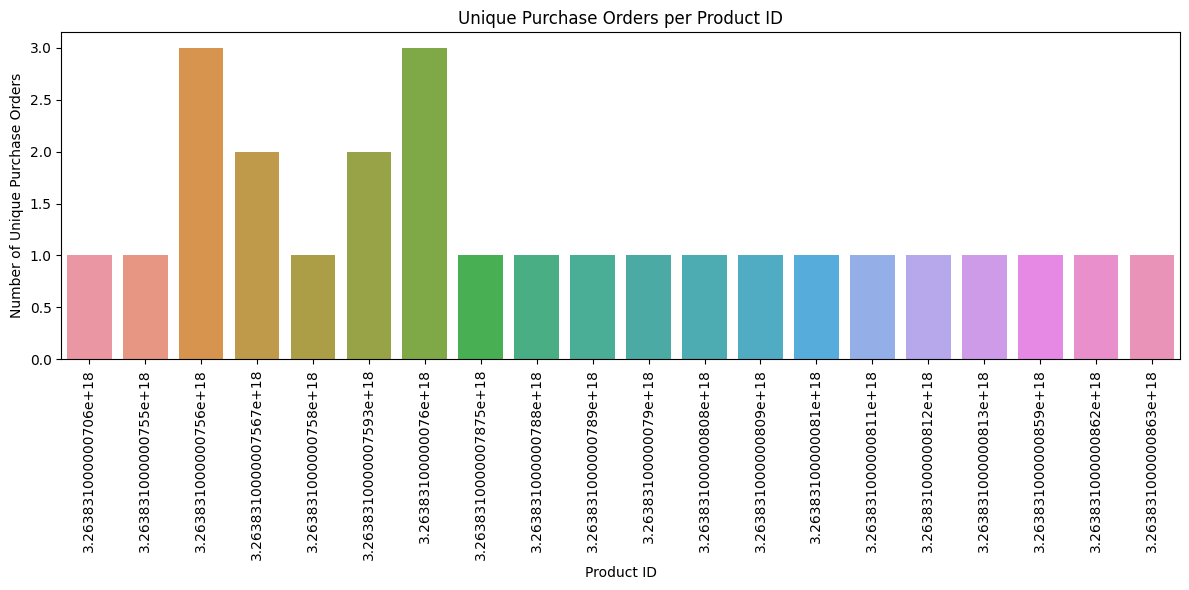

In [293]:
# Count unique Purchase Order IDs per Product ID
grouped['num_orders'] = grouped['Purchase Order ID'].apply(lambda x: len(set(x)))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product ID', y='num_orders', data=grouped.head(20))  # show top 20 for readability
plt.xlabel('Product ID')
plt.ylabel('Number of Unique Purchase Orders')
plt.title('Unique Purchase Orders per Product ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [294]:
df.to_excel('FinalFile.xlsx', index=False)